In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно.

In [5]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [8]:
cov = np.round(data.iloc[:,1:].cov(),2)
cov.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041.00,1100.84,995.93,1061.21,1657.43,1108.09,370.87,1008.95,1615.00,1613.37
SD of Ladder,1100.84,2041.00,173.69,1259.81,1219.52,512.36,506.90,797.78,1254.53,1208.03
Positive affect,995.93,173.69,2015.00,785.24,778.33,1373.77,405.29,715.08,586.12,647.91
Negative affect,1061.21,1259.81,785.24,2015.00,1253.10,866.94,309.23,681.53,1050.93,944.80
Social support,1657.43,1219.52,778.33,1253.10,2015.00,904.54,230.74,891.50,1509.29,1471.92


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [9]:
data[data["Country (region)"].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy


Отсутствующих значений нет

Сколько стран в выборке? Написать ответ.

In [10]:
total_countries = len(data.iloc[:,0].unique())
print(f"В датасете - {total_countries} стран.")

В датасете - 156 стран.


Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:

Евразия,
Африка,
Северная Америка,
Южная Америка,
Австралия,
Антарктида.
Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента.

Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

In [4]:
continents = pd.read_csv('continents.csv', delimiter=',')
continents.head()

,Country,Continent
0,United States of America,North America
1,Indonesia,Asia
2,India,Asia
3,Colombia,South America
4,Chile,South America


In [11]:
data = data.merge(right=continents, left_on="Country (region)", right_on="Country", how="left").drop('Country', axis=1)

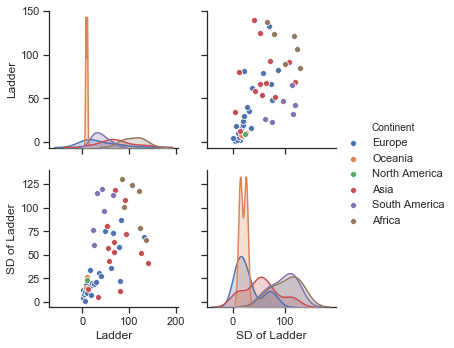

In [16]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, vars=["Ladder","SD of Ladder"], hue='Continent')
plt.show()

/Users/Belotelov/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Belotelov/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Belotelov/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


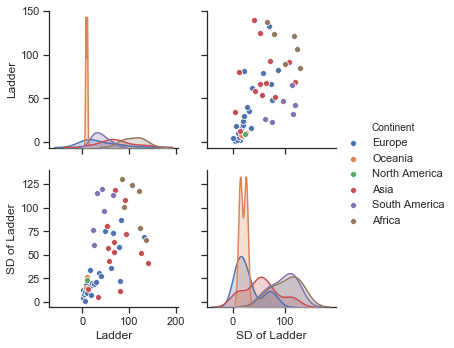

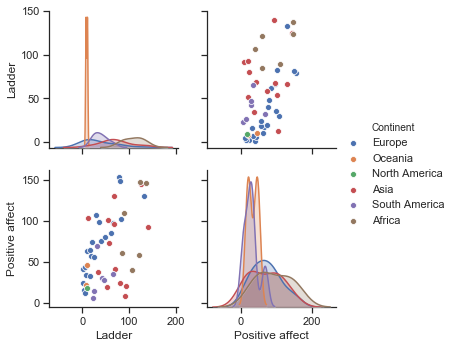

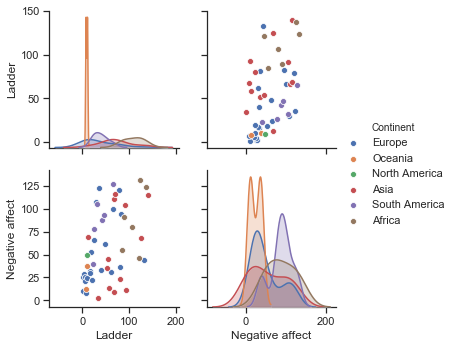

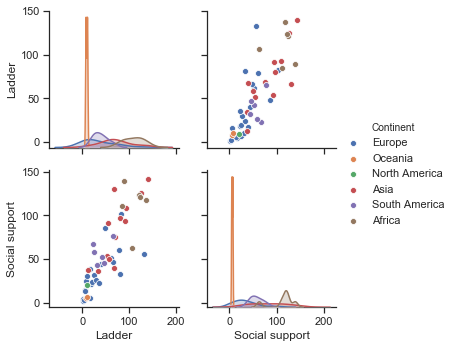

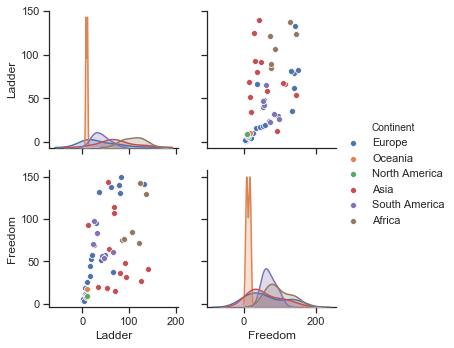

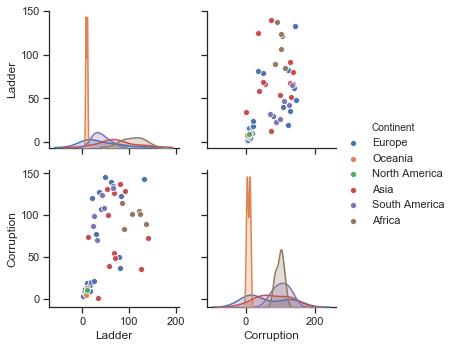

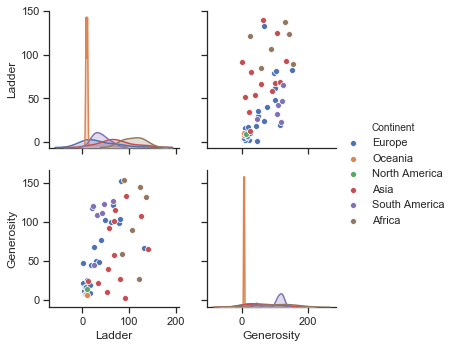

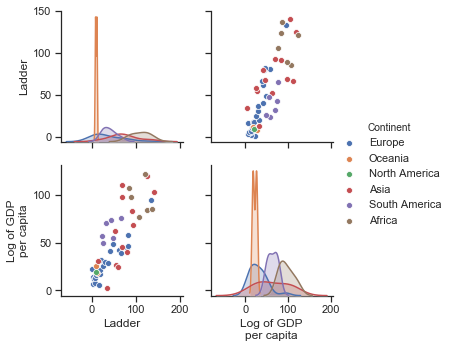

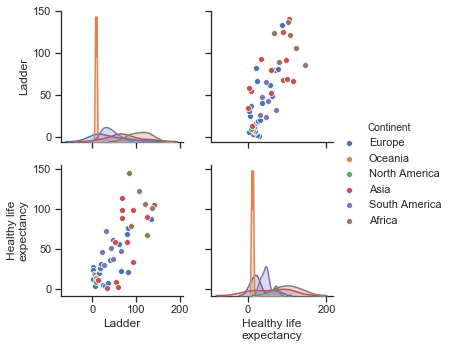

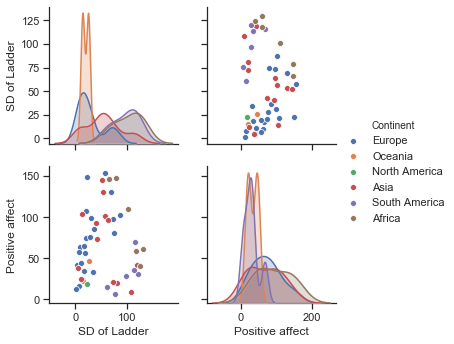

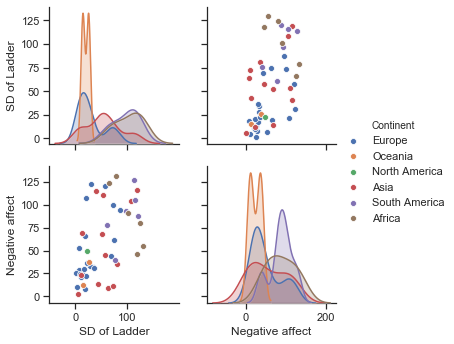

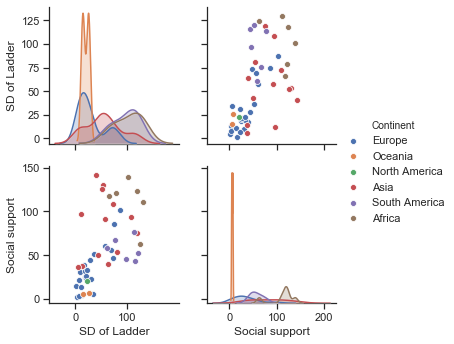

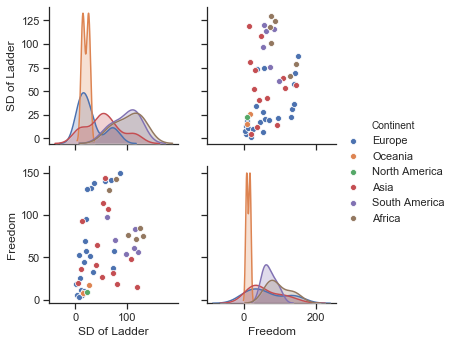

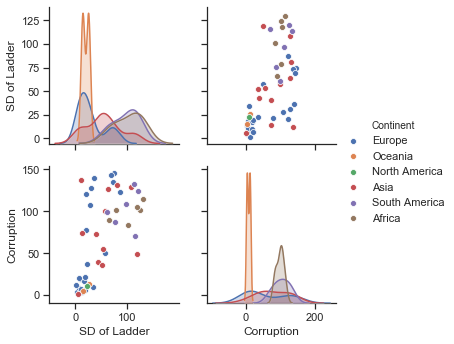

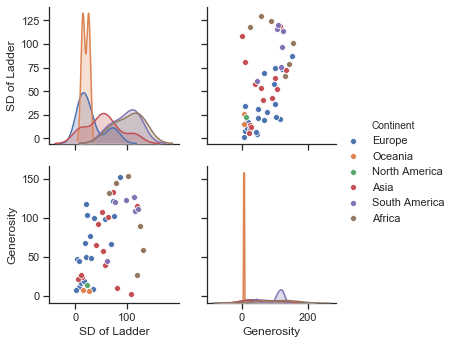

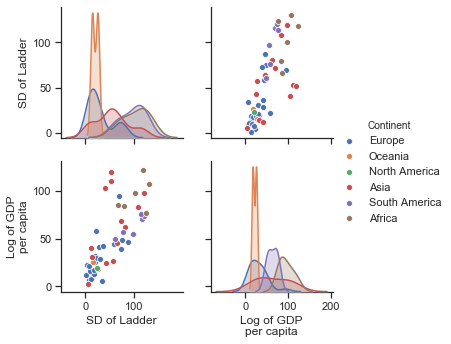

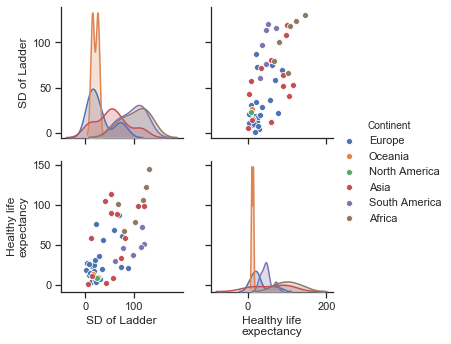

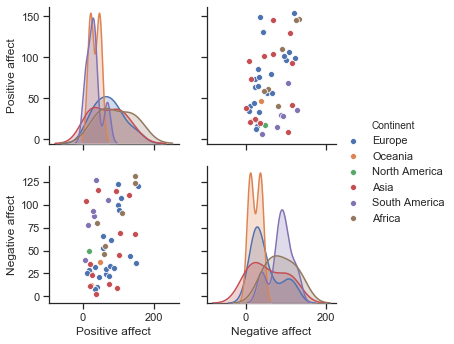

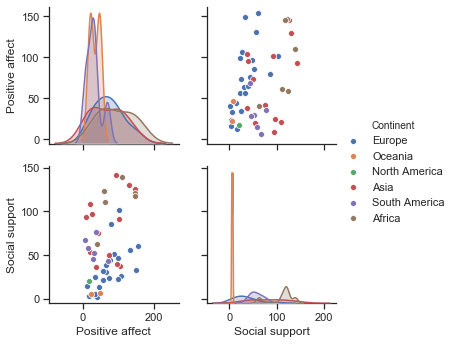

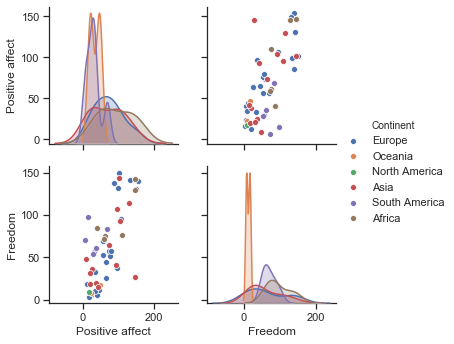

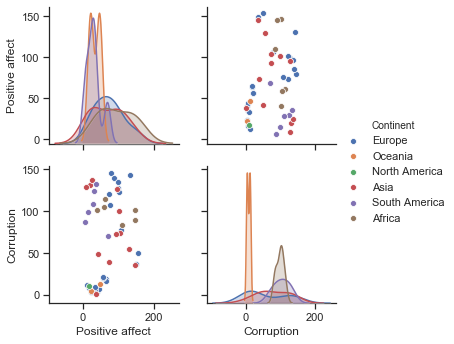

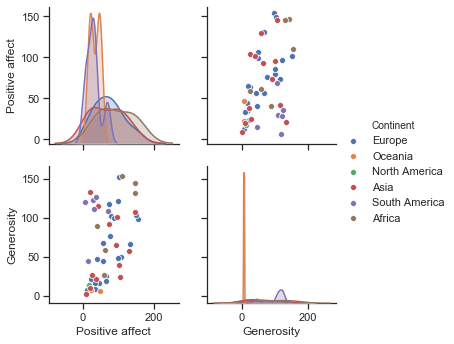

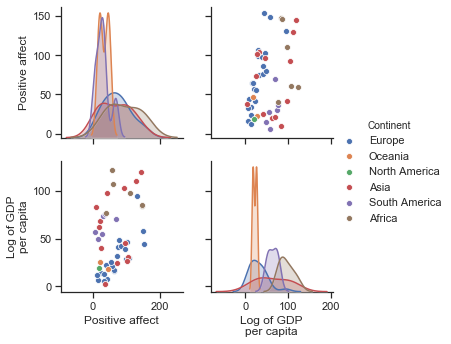

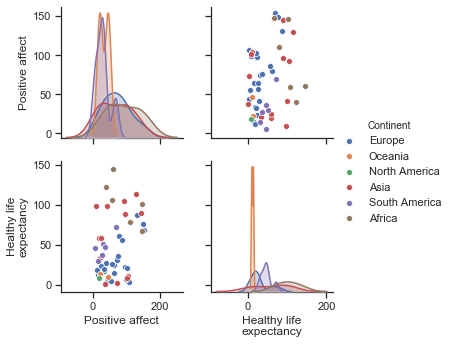

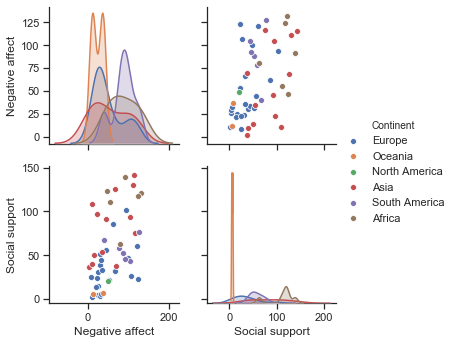

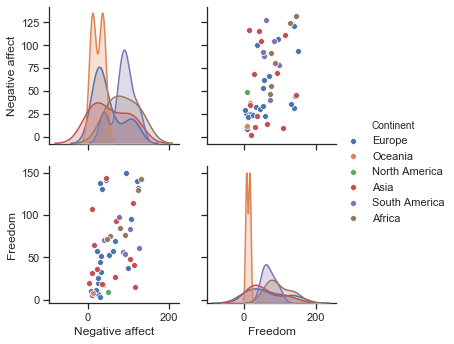

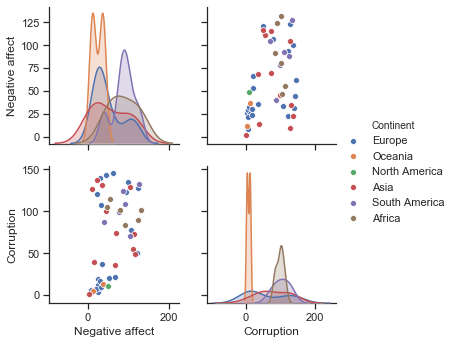

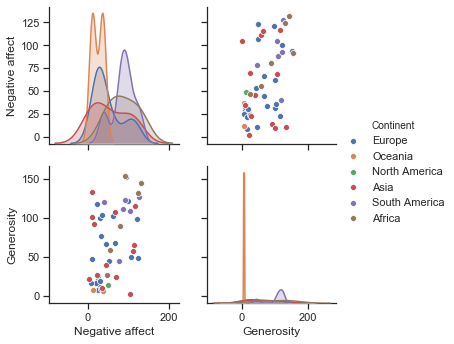

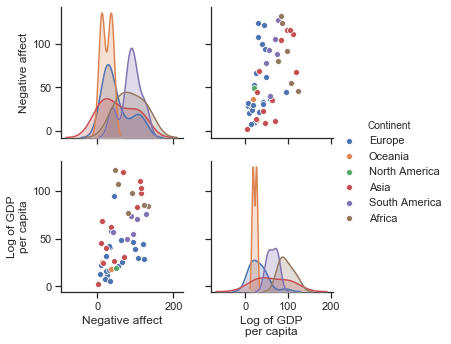

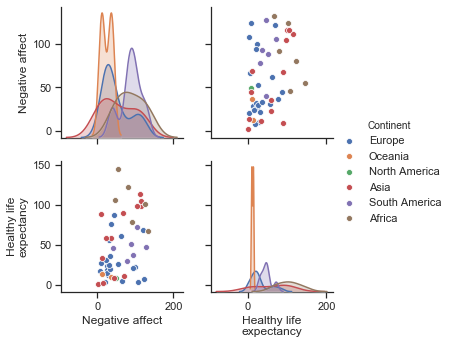

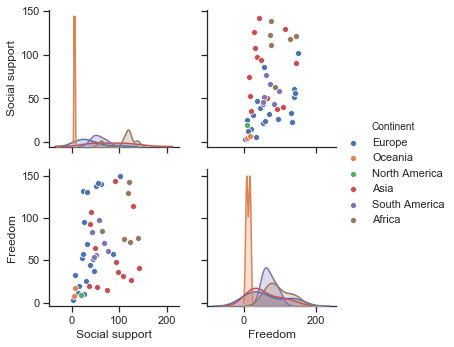

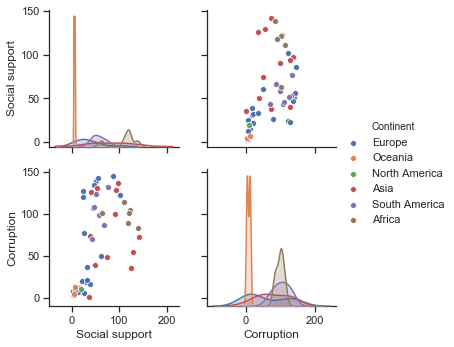

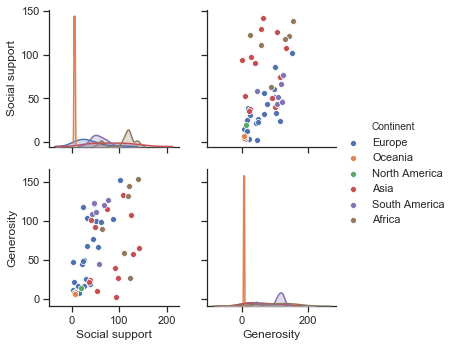

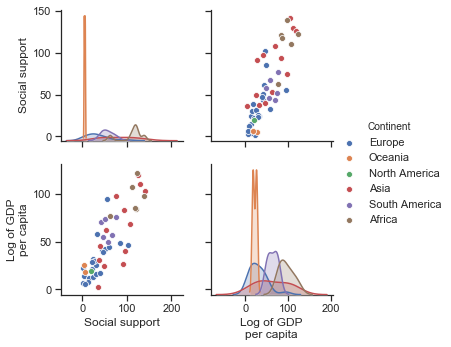

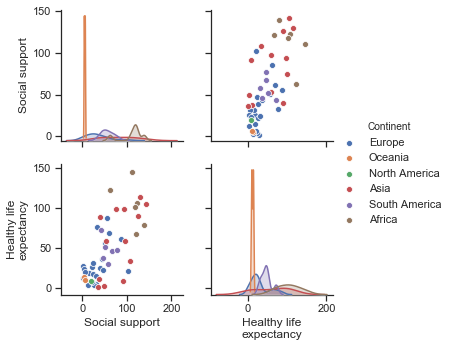

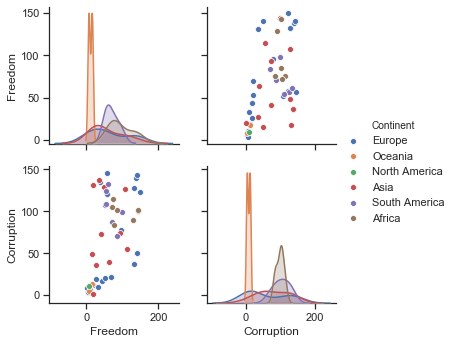

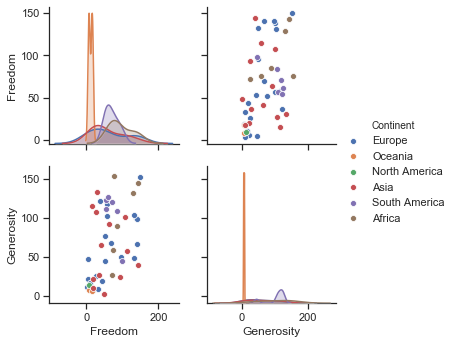

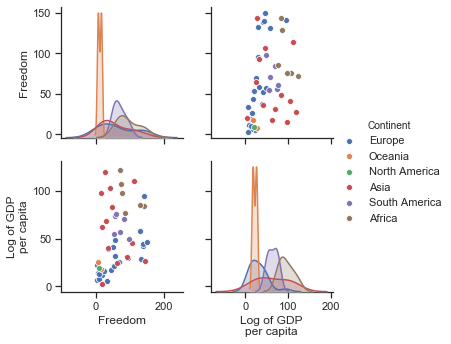

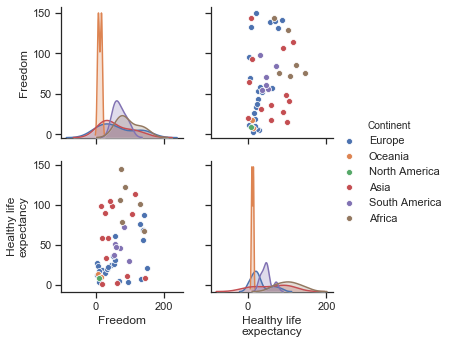

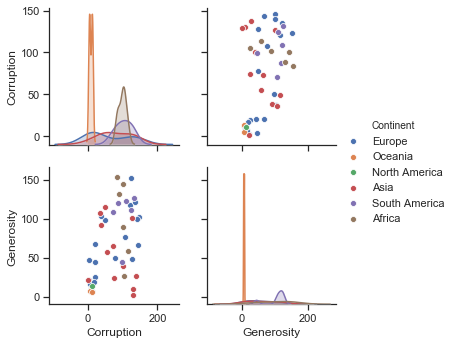

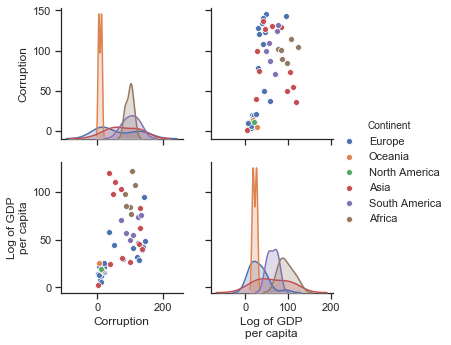

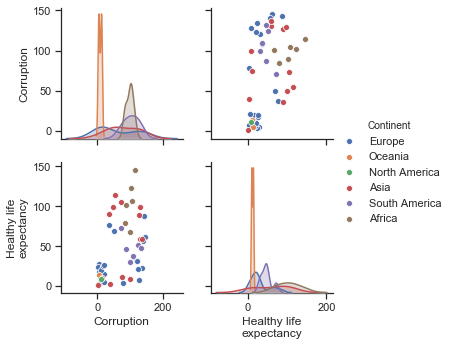

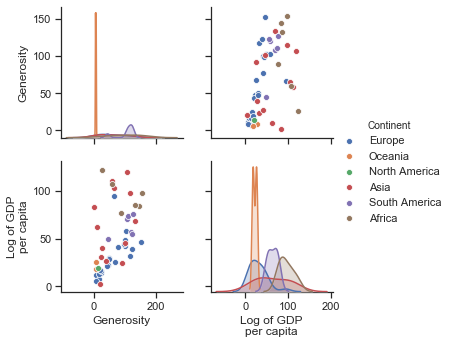

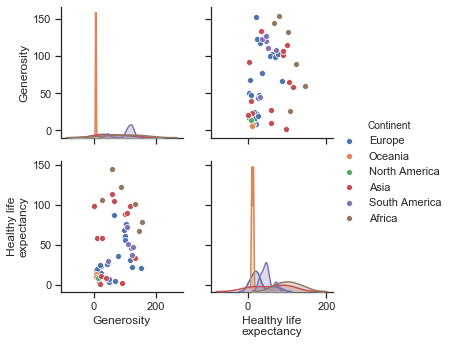

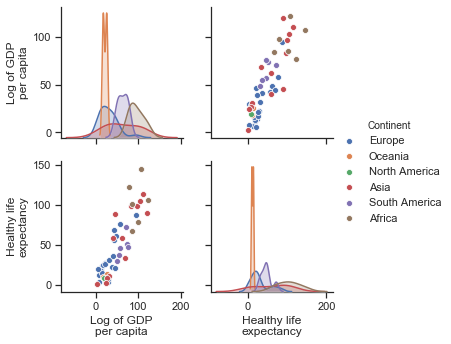

In [17]:
from itertools import combinations
variables_count = 2
for columns_names in combinations(data.iloc[:,1:-1].columns, variables_count):
#     print(columns_names)
    sns.pairplot(data, vars=list(columns_names), hue="Continent")

Больше всего между собой похожи Южная и Северная америки.

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

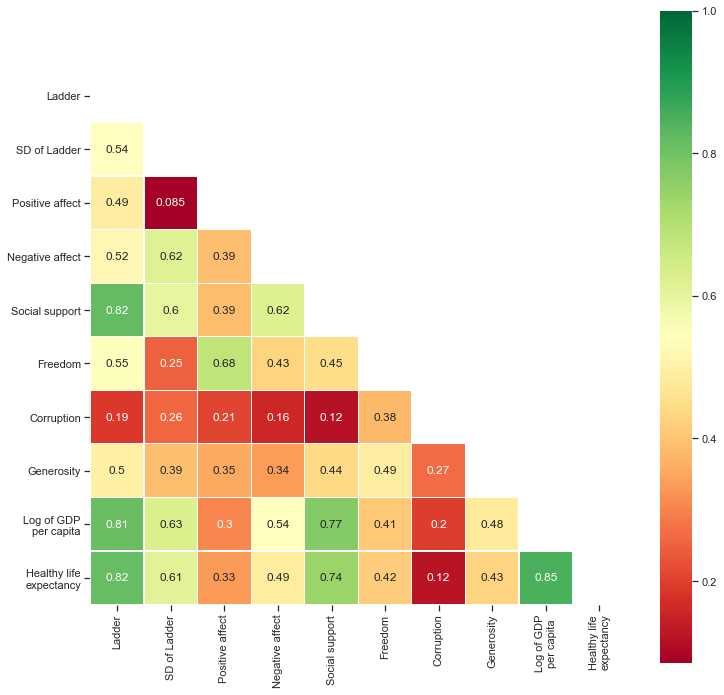

In [18]:
plt.figure(figsize = (12,12))

corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

Выводы как в первом задании.

Регрессионный анализ - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов.

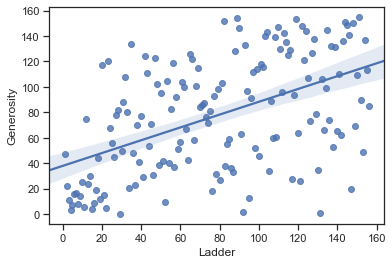

In [19]:
data["Ladder"].fillna(0, inplace = True)
data["Generosity"].fillna(0, inplace = True)
sns.regplot(x=data["Ladder"], y=data["Generosity"], data=data, fit_reg=True)
plt.show()

Собственное значение:  3068.35 Собственный вектор:  [0.70710678 0.70710678]


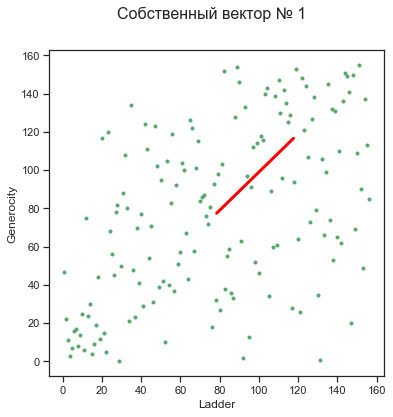

Собственное значение:  1013.65 Собственный вектор:  [-0.70710678  0.70710678]


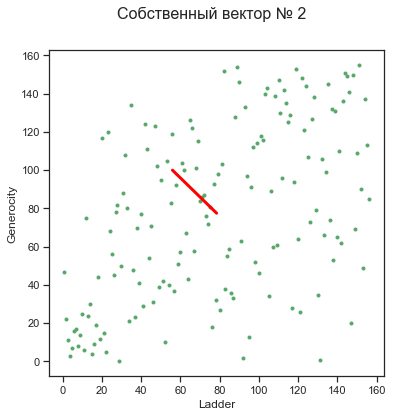

In [20]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

Y = np.vstack((data["Ladder"], data["Generosity"])).T
w,v = la.eig(np.cov(Y.T))

for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(data["Ladder"], data["Generosity"], 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generocity')
    plt.plot([data["Ladder"].mean(), data["Ladder"].mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [data["Generosity"].mean(), data["Generosity"].mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()

# Дискретное распределение случайной величины¶

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

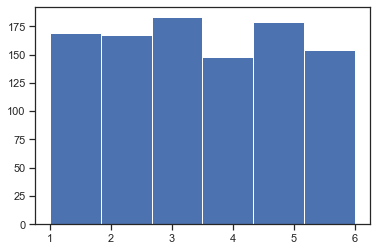

In [21]:
import random
def dice():
    return(random.randint(1,6))

plt.hist([dice() for _ in range(0,1000)], bins=6)
plt.show()

Распределение - равномерное.

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

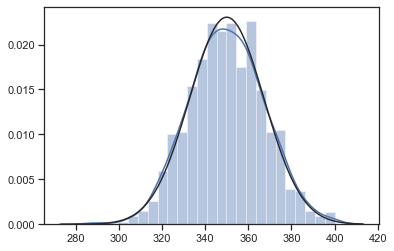

In [22]:
series = [sum([x for x in [dice() for _ in range(0,100)]]) for _ in range(0,1000)]
from scipy.stats import norm
sns.distplot(a=series, fit=norm)
plt.show()

Распределение - нормальное, так как в модели сумма выпавших значений броска - полностью случайная величина и, поэтому эти несвязанныемежду собой случайные величины будут стремиться к нормальному распределению.